# run cracking

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from helper_func import *
from cracking import Cracking_Model

# case study

In [2]:
class Param: pass
raw_pars = Param()

r0_bar_mean = 5e-3
x_loss_mean = 12.5e-6*0.6 # m
cover_mean = 4e-2
f_t_mean=5.
E_0_mean=32e3

raw_pars.r0_bar = Normal_custom(r0_bar_mean, 0.1*r0_bar_mean, non_negative=True)
raw_pars.x_loss = Normal_custom(x_loss_mean, 0.1*x_loss_mean, non_negative=True)
raw_pars.cover = Normal_custom(cover_mean, 0.1*cover_mean, non_negative=True)
raw_pars.f_t = Normal_custom(f_t_mean, 0.1*f_t_mean, non_negative=True)
raw_pars.E_0 = Normal_custom(E_0_mean, 0.1*E_0_mean, non_negative=True)
raw_pars.w_c = Normal_custom(0.5, 0.1*0.6, non_negative=True)
raw_pars.r_v = Beta_custom(2.96, 2.96*0.05, 3.3, 2.6)  # volumetric expansion rate  2.96 lower 2.6  upper: 3.3



In [3]:
M = Cracking_Model(raw_pars)
# M.run(stochastic=False)
%time M.run(stochastic=True)

/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2/cracking.py:56: RuntimeWarning: invalid value encountered in less_equal
  idx_0 = np.where(epsilon_theta <= epsilon_cr)
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2/cracking.py:59: RuntimeWarning: invalid value encountered in greater
  idx_1 = np.where((epsilon_theta > epsilon_cr) & (epsilon_theta <= epsilon_1))
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2/cracking.py:59: RuntimeWarning: invalid value encountered in less_equal
  idx_1 = np.where((epsilon_theta > epsilon_cr) & (epsilon_theta <= epsilon_1))
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2/cracking.py:62: RuntimeWarning: invalid value encountered in greater
  idx_2 = np.where((epsilon_theta > epsilon_1) & (epsilon_theta <= epsilon_u))
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2/cracking.py:62: RuntimeWarning: invalid value encountered in less_equal
  idx_2 = np.w

CPU times: user 10.1 s, sys: 150 ms, total: 10.3 s
Wall time: 10.3 s


In [14]:
%prun -s cumulative M.run(stochastic=True)

/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2/cracking.py:56: RuntimeWarning: invalid value encountered in less_equal
  idx_0 = np.where(epsilon_theta <= epsilon_cr)
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2/cracking.py:59: RuntimeWarning: invalid value encountered in greater
  idx_1 = np.where((epsilon_theta > epsilon_cr) & (epsilon_theta <= epsilon_1))
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2/cracking.py:59: RuntimeWarning: invalid value encountered in less_equal
  idx_1 = np.where((epsilon_theta > epsilon_cr) & (epsilon_theta <= epsilon_1))
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2/cracking.py:62: RuntimeWarning: invalid value encountered in greater
  idx_2 = np.where((epsilon_theta > epsilon_1) & (epsilon_theta <= epsilon_u))
/Users/gangli/Local Documents/Mitacs project local/Tinkrete_beta 0.2/cracking.py:62: RuntimeWarning: invalid value encountered in less_equal
  idx_2 = np.w

In [4]:
M.postproc()
print(M.crack_visible_rate_count)

for stochastic solution only
0.0


(array([70515.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 29485.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

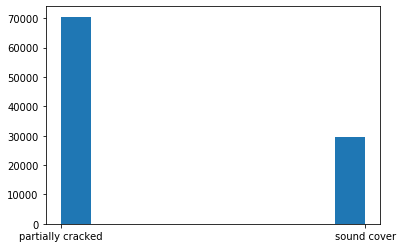

In [5]:
plt.figure()
plt.hist(M.crack_condition)

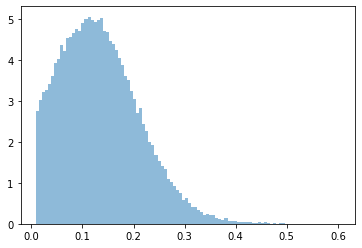

In [6]:
Hist_custom(M.crack_length_over_cover[M.crack_length_over_cover != 0])